# **Concepts Covered:**

- <a href = #link1>Binomial Distribution</a>
- <a href = #link2>Continuous Uniform Distribution</a>
- <a href = #link3>Normal Distribution</a>
- <a href = #link4>Central Limit Theorem (CLT)</a>
- <a href = #link5>Point Estimation</a>
- <a href = #link6>Confidence Interval</a>






# <a name='link1'>**Binomial Distribution**</a>

## Problem statement 

80% of all the visitors to Lavista Museum end up buying souvenirs from the 
souvenir shop at the Museum. 
On the coming Sunday, if a random sample of 10 visitors is picked:

1. Find the probability that every visitor will end up buying from the souvenir shop
2. Find the probability that a maximum of 7 visitors will buy souvenirs from the souvenir shop

Let's check first whether we satisfy the assumptions of the binomial distribution.

- There are only two possible outcomes (success or failure) for each trial. A visitor will buy souvenirs from shop or not (yes or no). 
- Number of trials (n) is fixed - There are 10 visitors in the sample.
- Each trial is independent of the other trials - It is reasonable to assume that the buying activity of visitors is independent.
- The probaility of success (p) is the same for each trial - The probability of success for each visitor is 0.8.

### Let's import the libraries 

In [1]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations
from matplotlib.ticker import MaxNLocator
import matplotlib.patheffects as path_effects

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions 
                             # as well as a growing library of statistical functions
from scipy.stats import binom

In [2]:
# Prepare the environment
np.set_printoptions(suppress=True)
suptitle_param = dict(color='darkslategray', weight='bold', fontsize='x-large')

# Defined functions to work with binomial distribution
def get_binomial_pmf(n, p, k=None, ax=None, label=True):
    """Show the binimial distribution and the probability of event v.
    n: int, sample size.
    p: float, probability of event.
    k: optional. Event value of interest.
    ax: axis to plot. If no, new plot is created.
    label: whether to add labels to the bars. Default True.
    """
    # declare different possible number of visitors selected in a numpy array
    v = np.arange(0, n+1) 
    
    # use the binom.pmf() function to generate the probability distribution
    binomial = binom.pmf(k=v, n=n, p=p)
    if k:
        print(f'Probability of event={k} is {binomial[k]:.1%}.')

    # plot the distribution
    end = False
    if not ax:
        fig = plt.figure(figsize = (10,3))
        ax = fig.add_subplot(1, 1, 1)
        end = True
    
    bar = ax.bar(v, binomial) # make a bar plot
    if label:
        for i in range(len(v)):
            ax.text(i, binomial[i]*1.01, f"{binomial[i]:0.4f}", ha='center')
    if k: 
        bar[k].set_color("r")
    ax.set_xticks(v)
                       
    ylim = ax.get_ylim()
    ax.set_ylim(ylim[0], ylim[1]*1.1)
    ax.set_title("Binomial: n=%i , p=%.2f" % (n, p), **suptitle_param) # set the title
    ax.set_xlabel("Number of Successes") # set the x-axis label
    ax.set_ylabel("Probability of Successes") # set the y-axis label
    
    if end:
        plt.tight_layout()
        plt.show() # display the plot
    
    
# Defined functions to work with binomial distribution
def get_binomial_cdf(n, p, k, left=False):
    """Show the cumulative distribution function of v in a Binomial distribution.
    n: int, sample size.
    p: float, probability of event.
    k: trial.
    v: event limit of interest.
    """
    # declare different possible number of visitors selected in a numpy array
    v = np.arange(0, n+1) 
    
    # use the binom.pmf() function to generate the probability distribution
    binomial = binom.pmf(k=v, n=n, p=p)
    r = binom.cdf(k, n, p)
    if left:
        r = 1 - r
        color_bar = range(k+1, len(v))
        sign='>'
    else:
        color_bar = range(k+1)
        sign='<='
        
    print(f'Probability of event{sign}{k} is {r:.1%}.')
    
    # plot the probability distribution to better visualize the calculations.
    plt.figure(figsize = (10,3))
    ax = plt.bar(v, binomial) # make a bar plot
    for i in range(len(v)):
        plt.text(i, binomial[i]*1.01, f"{binomial[i]:0.4f}", ha='center')
    for i in color_bar:
        ax[i].set_color("r") # color the bars in red where number of successes is less than 8
    plt.xticks(v)
    ylim = plt.ylim()
    plt.ylim(ylim[0], ylim[1]*1.1)
    plt.title("Binomial: n=%i , p=%.2f" % (n, p), **suptitle_param) # set the title
    plt.xlabel("Number of Successes") # set the x-axis label
    plt.ylabel("Probability of Successes") # set the y-axis label
    plt.tight_layout()
    plt.show() # display the plot

### Let's estimate the probability distribution of visitors

The probability function of Binomial Distribution provides the probability for  x  number of successes from n trials where  p is the probability of success   

>$P(X=x)= {n\choose x}p^x(1-p)^{n-x}$


Here, we know that:

* n ( number of visitors selected randomly ) = 10
* p ( probability of success i.e., the probability that a visitor will end up buying a souvenir) = 0.80
* q ( probability of failure i.e., the probability that a visitor will not end up buying a souvenir) = 1 - 0.80 = 0.20
* x ( number of successes ) = 10


We will use binom.pmf() to calculate this probability function which provides the probability for the number of visitors (out of n=10) that will end up buying souvenirs from the souvenir shop.

As you will see **binomial** is the array of probabilities for different number of successes. Let us visualize the same in the following plot.

Probability of event=10 is 10.7%.


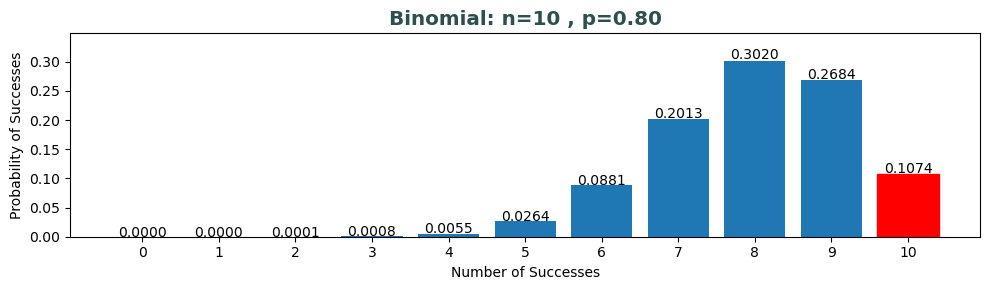

In [3]:
# import the required function
from scipy.stats import binom

# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

# declare p which represents the probability of success, i.e., 
# the probability that a visitor will end up buying a souvenir
p = 0.80

# Getting the probability of that every visitor will end up buying from 
# the souvenir shop in a sample of 10
v = 10
get_binomial_pmf(n, p, v)

Probability of event=10 is 10.7%.


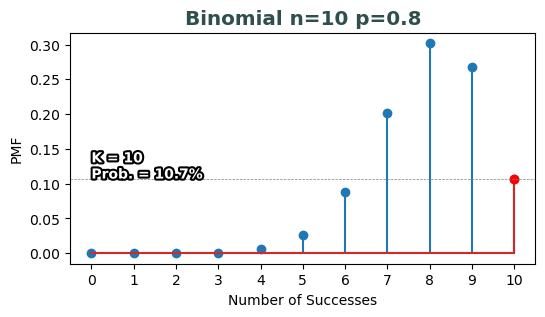

In [4]:
# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

# declare p which represents the probability of success, i.e., 
# the probability that a visitor will end up buying a souvenir
p = 0.80

# Getting the probability of that every visitor will end up buying from 
# the souvenir shop in a sample of 10
k = 10

# declare different possible number of visitors selected in a numpy array
v = np.arange(0, n+1) 

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=v, n=n, p=p)
print(f'Probability of event={k} is {binomial[k]:.1%}.')

# PMF representation
fig = plt.figure(figsize=(6,3))
ax = fig.gca()
plt.stem(v, binomial, 'C0-')
plt.stem(k, binomial[k], 'C3-', markerfmt='ro')
plt.axhline(binomial[k], ls='--', lw=0.5, color='gray')
text = plt.annotate("K = {}\nProb. = {:,.1%}".format(k, binomial[k]), 
                    xy=(v[0], binomial[k]), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel('Number of Successes')
plt.ylabel('PMF')
plt.xticks(v)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Binomial n={} p={}".format(n, p), **suptitle_param)
plt.show()

The last element of this **binomial** array represents the probability when the number of successes is 10 (which means that all 10 visitors (out of 10 selected randomly) will buy souvenirs from the souvenir shop)

The above probability shows that the probability of exactly 10 successes is  ~ 0.11.

Now, we are interested in knowing the probability of at most 7 successes which means what is the probability that out of 10 randomly selected visitors, a maximum of 7 visitors will buy souvenirs from the souvenir shop.

Here, we need to calculate the probability for P(X<=7). CDF is used to calculate the cumulative probability.



**CDF:** of a Random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$

In our case, Random Variable (X) is the number of visitors who will buy souvenirs from the souvenir shop.

$P(X\leq 7)$


Probability of event<=7 is 32.2%.


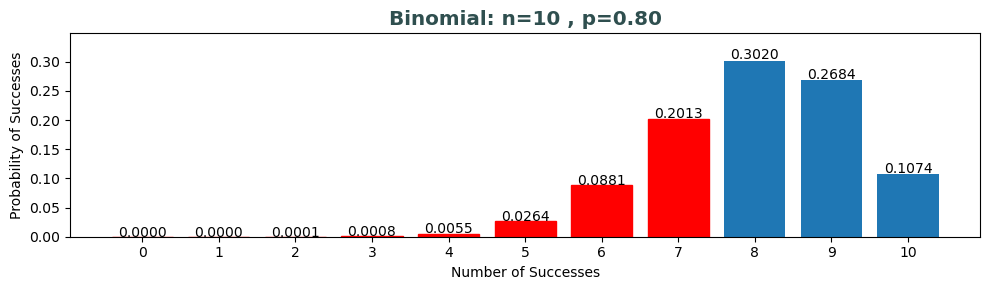

In [5]:
# calculate cdf
get_binomial_cdf(n, p, 7)

Probability of event<=7 is 32.2%.


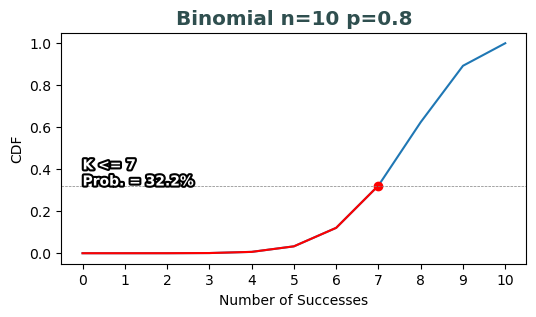

In [6]:
# declare the sample size in variable n which represents the number of visitors selected randomly
n = 10

# declare p which represents the probability of success, i.e., 
# the probability that a visitor will end up buying a souvenir
p = 0.80

# Getting the probability of that every visitor will end up buying from 
# the souvenir shop in a sample of 10
# Getting the probability of at most 7 visitors will buy souvenirs from 
# the souvenir shop in a sample of 10
k = 7

# declare different possible number of visitors selected in a numpy array
v = np.arange(0, n+1) 

# use the binom.cdf() function to generate the Cumulative distribution
binomial = binom.cdf(k=v, n=n, p=p)
print(f'Probability of event<={k} is {binomial[k]:.1%}.')

# CDF representation
fig = plt.figure(figsize=(6,3))
plt.plot(v, binomial)
# plt.gca().fill_between(v[0:k], [0]*k, binomial[0:k], color='r')
plt.plot(v[0:k+1], binomial[0:k+1], 'r')
plt.plot(k, binomial[k], 'ro')
plt.axhline(binomial[k], ls='--', lw=0.5, color='gray')
text = plt.annotate("K <= {}\nProb. = {:,.1%}".format(k, binomial[k]), 
                    xy=(v[0], binomial[k]), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel('Number of Successes')
plt.xlabel('Number of Successes')
plt.ylabel('CDF')
plt.xticks(v)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Binomial n={} p={}".format(n, p), **suptitle_param)
plt.show()

In the above graph, the red region represents P(X<=7).
Let's calculate the probability that out of 10 randomly selected visitors, a maximum of 7 will buy souvenirs from the souvenir shop. We will use binom.cdf() for this.

### Conclusion: 

There is a 10.74% chance that every visitor will end up buying souvenirs from the souvenir shop.

There is q 32.22% chance that a maximum of 7 visitors out of 10 will buy souvenirs from the souvenir shop.

Let's try to change the probability of success (probability that each visitor will buy souvenirs from the souvenir shop) to different values like 60%,70%,90%,95% and visualize how the shape of the distribution changes.

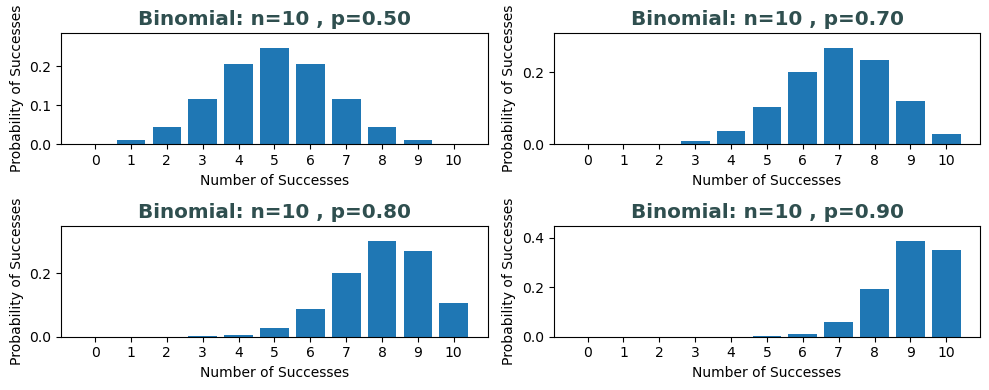

In [7]:
# sns.set(font_scale=0.5)
fig, axis = plt.subplots(2, 2, figsize=(10, 4))
axis = axis.flatten()
get_binomial_pmf(n, p=0.5, ax=axis[0], label=False)
get_binomial_pmf(n, p=0.7, ax=axis[1], label=False)
get_binomial_pmf(n, p=0.8, ax=axis[2], label=False)
get_binomial_pmf(n, p=0.9, ax=axis[3], label=False)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

### Conclusion:

It is clear from the above plot that the shape of the distribution changes as the value of p (probability of success) changes.

#### ✅ $\color{darkgreen}{\text{Exercise:}}$

The probability of an employee leaving the company within 6 months is 0.6. If 10 employees are selected randomly, which of the following codes can be used to find the probability that 7 out of the 10 employees will leave the company within 6 months?

0.21499084799999976
Probability of event=7 is 21.5%.


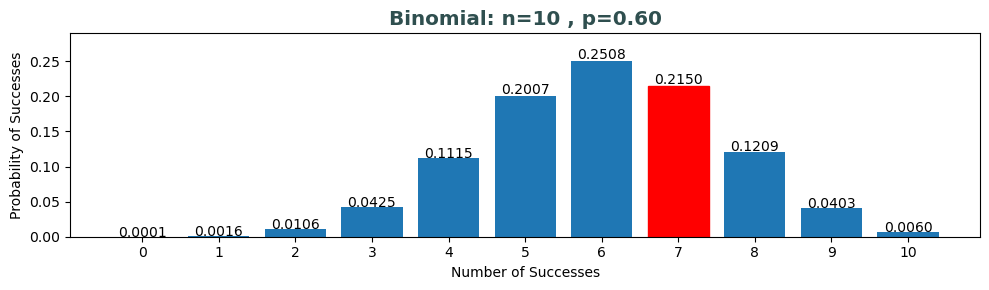

In [8]:
print(binom.pmf(k = 7,n = 10, p = 0.6))
get_binomial_pmf(n=10, p=0.6, k=7)

Probability of event=7 is 21.5%.


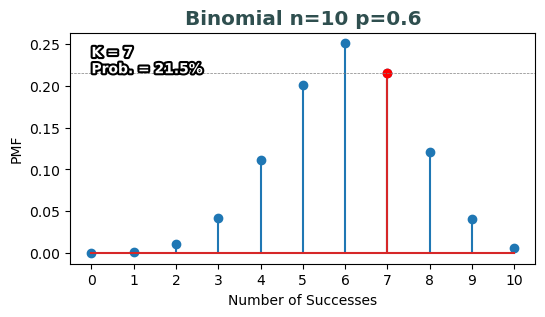

In [9]:
n = 10 # Sample size
p = 0.60 # Probability of success 
k = 7 # Event

v = np.arange(0, n+1) # Possible values

# use the binom.pmf() function to generate the probability distribution
binomial = binom.pmf(k=v, n=n, p=p)
print(f'Probability of event={k} is {binomial[k]:.1%}.')

# PMF representation
fig = plt.figure(figsize=(6,3))
ax = fig.gca()
plt.stem(v, binomial, 'C0-')
plt.stem(k, binomial[k], 'C3-', markerfmt='ro')
plt.axhline(binomial[k], ls='--', lw=0.5, color='gray')
text = plt.annotate("K = {}\nProb. = {:,.1%}".format(k, binomial[k]), 
                    xy=(v[0], binomial[k]), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel('Number of Successes')
plt.ylabel('PMF')
plt.xticks(v)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Binomial n={} p={}".format(n, p), **suptitle_param)
plt.show()

Several companies are working on the COVID vaccine. The probability of a vaccine getting approved by the CDC is 0.75. If 15 vaccines are randomly selected, which of the following codes can be used to find the probability of at least 6 getting approved by the CDC?

0.9992050509899855
Probability of event>5 is 99.9%.


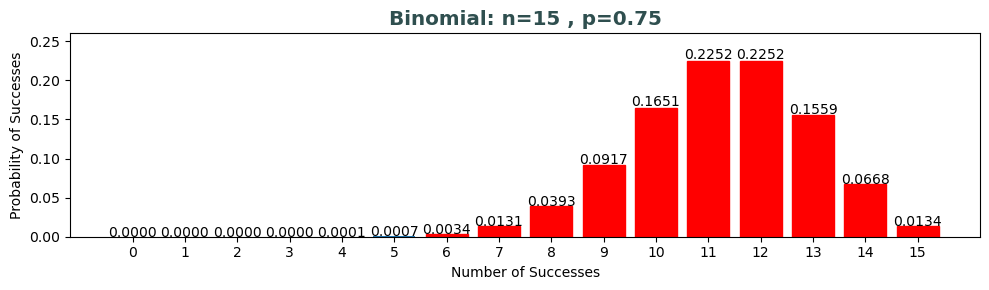

In [10]:
print(1-binom.cdf(k = 5,n = 15, p = 0.75))
get_binomial_cdf(n=15, p=0.75, k=5, left=True)

Probability of event>5 is 99.9%.


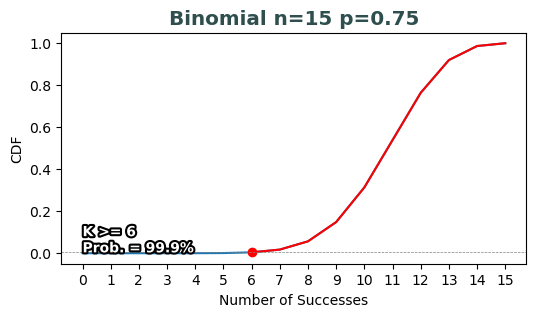

In [11]:
n = 15 # Sample size
p = 0.75 # Probability of success 
k = 5 # Event >= 6  

v = np.arange(0, n+1) # Possible values

# use the binom.cdf() function to generate the Cumulative distribution
binomial = binom.cdf(k=v, n=n, p=p)
# print(f'Probability of event>{k} is {1-binomial[k-1]:.1%}.')
print(f'Probability of event>{k} is {binom.sf(k, n, p):.1%}.')

# CDF representation
fig = plt.figure(figsize=(6,3))
plt.plot(v, binomial)
# plt.gca().fill_between(v[0:k], [0]*k, binomial[0:k], color='r')
plt.plot(v[k+1:], binomial[k+1:], 'r')
plt.plot(k+1, binomial[k+1], 'ro')
plt.axhline(binomial[k+1], ls='--', lw=0.5, color='gray')
text = plt.annotate(f"K >= {k+1}\nProb. = {binom.sf(k, n, p):,.1%}", 
                    xy=(v[0], binomial[k+1]), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel('Number of Successes')
plt.xlabel('Number of Successes')
plt.ylabel('CDF')
plt.xticks(v)
# ax.xaxis.set_major_locator(MaxNLocator(integer=True))
plt.title("Binomial n={} p={}".format(n, p), **suptitle_param)
plt.show()


# <a name='link2'>**Continuous Uniform Distribution**</a>

### Problem statement


 IT industry records the amount of time a software engineer needs to fix a  bug in the initial phase of software development in 'debugging.csv'.

Let

X = Time needed to fix bugs


X is a continuous random variable. Let's see the distribution of X and answer the below questions.


1. Find the probability that a randomly selected software debugging requires less than three hours

2. Find the probability that a randomly selected software debugging requires more than two hours

3. Find the 50th percentile of the software debugging time



### Reading the Data into the Dataframe

In [12]:
debugging = pd.read_csv("data/debugging.csv")
debugging.head()

,Bug ID,Time Taken to fix the bug
0,12986,2.42
1,12987,2.03
2,12988,2.74
3,12989,3.21
4,12990,3.40


In [13]:
debugging['Time Taken to fix the bug'].describe()

count    2098.000000
mean        3.012531
std         1.147148
min         1.010000
25%         2.010000
50%         3.005000
75%         4.030000
max         5.000000
Name: Time Taken to fix the bug, dtype: float64

Let's plot the histogram of data along with the PDF of uniform distribution using the parameters minimum time required and maximum time required for bug fixing.

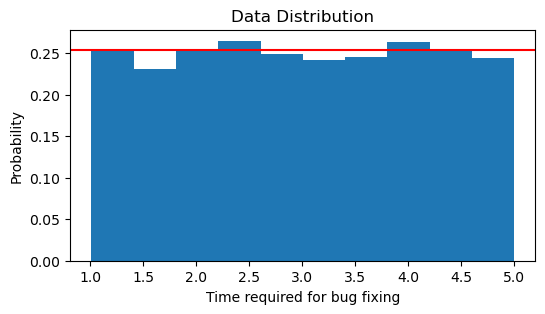

In [14]:
# visualize the distribution of the time needed for bug fixing
plt.figure(figsize=(6,3))
bar = plt.hist(debugging["Time Taken to fix the bug"], density=True)
# print(bar)
# # Output:
# # (array([0.25444928, 0.23055733, 0.25325468, 0.26520066, 0.24967089,
# #        0.2425033 , 0.2460871 , 0.26400606, 0.25564388, 0.2448925 ]), 
# #  array([1.01 , 1.409, 1.808, 2.207, 2.606, 3.005, 3.404, 3.803, 4.202,
# #        4.601, 5.   ]), <BarContainer object of 10 artists>)

# plt.axhline(1 / 4, color="red")
plt.axhline(bar[0][0], color="red")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Data Distribution")
plt.show()

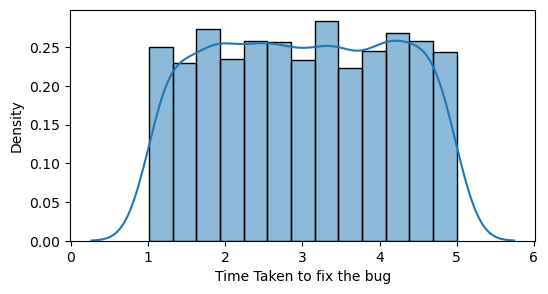

In [15]:
# Density plot of time taken to fix the bug using histplot
plt.figure(figsize = (6, 3))
sns.histplot(debugging["Time Taken to fix the bug"], kde=True, stat="density", kde_kws=dict(cut=3))
plt.show()

Another way to recognize a uniform distribution in your data is to look at a density plot. We will use displot of seaborn library to visualize the distribution of time needed for bug fixing.

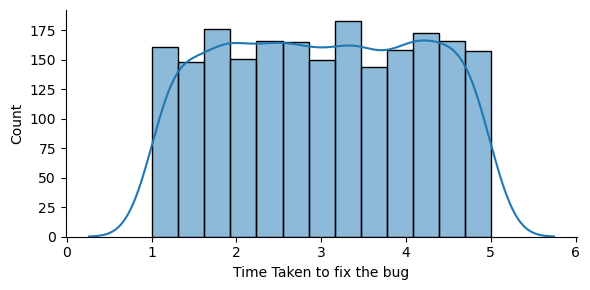

In [16]:
# Density plot of time taken to fix the bug
# sns.displot(debugging["Time Taken to fix the bug"], stat="density", kde=True, kde_kws=dict(cut=3), 
#             height=3, aspect=2)
sns.displot(debugging["Time Taken to fix the bug"], kde=True, kde_kws=dict(cut=3), 
            height=3, aspect=2)
plt.show()

**Insight**: As you can see from the above plot that all the values between 1 and 5 are having almost equal probability, we are going to use continuous uniform distribution. We need to decide the endpoints. Here, endpoints are 1 and 5.

X ~ U(1, 5)

In [17]:
# import the required function
from scipy.stats import uniform

# use the uniform.pdf() function to generate the probability distribution
x = np.linspace(1, 5, 50)
probs = uniform.pdf(x, loc=1, scale=4) # The first argument is the lower bound, and 
                                       # the second argument is the range of the 
                                       # distribution (max-min).
                                       # X ~ U(min, max) ~ U(1, 5)

**Find the probability that a randomly selected software debugging requires a maximum time of 3 hours** 

**CDF:** of a random variable (X) is the probability that X  will take the value less than or equal to x. It can be represented mathematically as below.

>$F_X(x) = P(X\leq x)$


In our case, random variable (X) is the number of hours.

$ P(X\leq 3)$

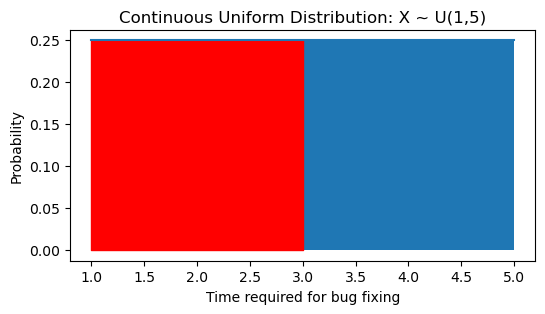

In [18]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(1, 3, 25)
plt.figure(figsize = (6, 3))
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In the above graph, the red region represents P(X<=3). Let's calculate the probability that that a randomly selected software debugging requires a maximum time of 3 hours. We will use uniform.cdf() for this.

In [19]:
uniform.cdf(x=3, loc=1, scale=4)

0.5


**Find the probability that a randomly selected software bug fixing requires more than two hours.**

$ P(X>2)$

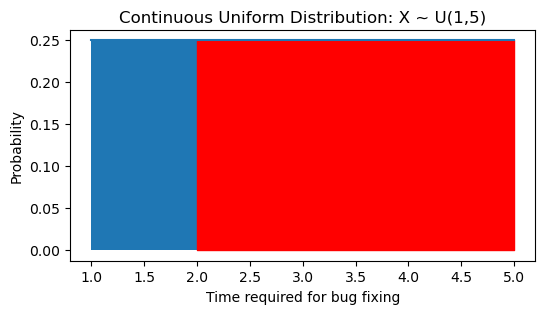

In [20]:
# plot the probability distribution
# We are plotting the distributions here to better visualize the calculations.
# Of course you do not 'need' to create the following visualization to answer the question above.
# You can directly use the cdf function for probability calculations.
x1 = np.linspace(2, 5, 20)
plt.figure(figsize = (6, 3))
plt.plot(x, probs)
plt.fill_between(x, probs)
plt.fill_between(x1, uniform.pdf(x=x1, loc=1, scale=4), color="r")
plt.xlabel("Time required for bug fixing")
plt.ylabel("Probability")
plt.title("Continuous Uniform Distribution: X ~ U(1,5)")
plt.show()

In the above graph, the reg region represent P(X>2). Let's calculate the probability that that that a randomly selected software debugging requires more than two hours. We will use uniform.cdf() for this.

In [21]:
1 - uniform.cdf(x=2, loc=1, scale=4)

0.75

**Let's calculate the 50th percentile of software debugging time.**

ppf(): It is used to calculate the percentile point given probability. It works opposite of cdf()

In [22]:
uniform.ppf(q=0.5, loc=1, scale=4) # Percent point function (inverse of cdf — percentiles).

3.0

### Conclusion:  

There is a 50% chance that a randomly selected software debugging requires less than three hours.

There is a 75% chance that a randomly selected software debugging requires more than two hours.

The 50th percentile of the software debugging time is 3 hours.

#### ✅ $\color{darkgreen}{\text{Exercise:}}$

There is a 25.0% chance that debbugging requires less or equal than to 2 hrs.
There is a 20.0% chance that debbugging requires more than to 4.2 hrs.
0.19999999999999996


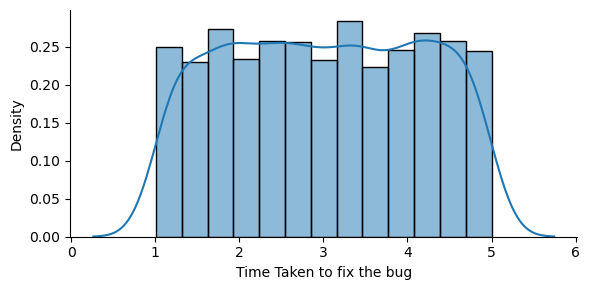

In [23]:
u = uniform(loc=1, scale=4)

# Find the probability that a randomly selected software debugging requires less 
# than or equal to 2 hrs.
prob = u.cdf(x=2)
print(f'There is a {prob:.1%} chance that debbugging requires less or equal than to 2 hrs.')

# Find the probability that a randomly selected software debugging requires more than 4.2 hours.
prob = u.sf(x=4.2)
print(f'There is a {prob:.1%} chance that debbugging requires more than to 4.2 hrs.')
print(1 - uniform.cdf(x=4.2, loc=1, scale=4))

# Density plot of time taken to fix the bug
sns.displot(debugging["Time Taken to fix the bug"], stat="density", kde=True, kde_kws=dict(cut=3), 
            height=3, aspect=2)
plt.show()

# <a name='link3'>**Normal Distribution**</a>

1. About 68% of the data fall within one standard deviation from the mean.
2. About 95% of the data fall within two standard deviation from the mean.
3. About 99.7% of the data fall within three standard deviation from the mean.

> A **standard normal** distribution has the mean is equal to 0 and the standard deviation is equal to 1.
> $$ StandardizationProcess \Rightarrow \frac{X - \mu}{\sigma} $$

#### ✅ $\color{darkgreen}{\text{Exercise:}}$

In [24]:
# The mean weight of a morning breakfast cereal pack is 0.295 kg 
# with a standard deviation of 0.025 kg. 
# The random variable weight of the pack follows a normal distribution. 
# How many standard deviations away from the mean is a pack that weighs 0.260 kg?
mean = 0.295
std  = 0.025
x = 0.260
(x - mean)/std

-1.399999999999999

In [25]:
# The mean delivery time for a food delivery company is normally distributed 
# with a mean of 47.5 minutes 
# and a standard deviation of 8.7 minutes.
# 68% of the deliveries will be done between _____ minutes and ___ minutes.
mean = 47.5
std = 8.7
(mean-std, mean+std)

(38.8, 56.2)

## Problem statement

A testing agency wants to analyze the complexity of SAT Exam 2020. They have collected the SAT scores of 1000 students in "sat_score.csv". Let's answer some of the questions that will help to decide the complexity of SAT exam 2020.


 
1. Calculate the probability that a student will score less than 800 in SAT exam
2. Calculate the probability that a student will score more than 1300 in SAT exam
3. Calculate the minimum marks a student must score in order to secure 90th percentile
4. Calculate the minimum marks a student must score in order to be in the top 5%



### Reading the Data into the Dataframe

In [26]:
sat_score = pd.read_csv("data/sat_score.csv")
sat_score.head()

,student_id,score
0,1,1018
1,2,1218
2,3,611
3,4,723
4,5,541


In [27]:
sat_score.score.describe()

count    1000.000000
mean     1007.460000
std       204.426007
min       288.000000
25%       873.000000
50%      1010.000000
75%      1148.000000
max      1612.000000
Name: score, dtype: float64

### Calculating the mean and standard deviation (parameters) of the SAT score 



In [28]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of the SAT scores data
mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
print("The estimated mean is", round(mu, 2))
print("The estimated standard deviation is", round(sigma, 2))

The estimated mean is 1007.46
The estimated standard deviation is 204.43


### Plotting the Distribution 

It  will help us analyze the shape of the data and visualize the PDF of normal distribution using the parameters (mean (mu) and Standard deviation (sigma)) from the data.

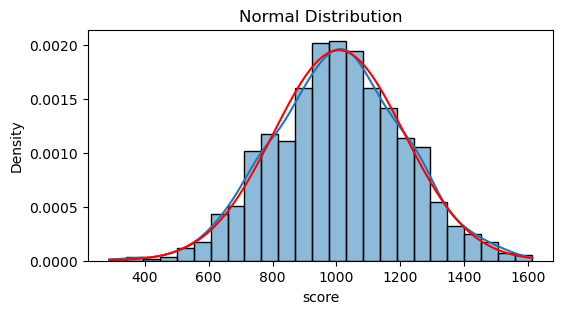

In [29]:
# calculate the pdf of SAT scores using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame

# create an array of 100 numbers in between the min and max score range and store it in the 
# first column of the empty DataFrame
density["x"] = np.linspace(
    sat_score["score"].min(), sat_score["score"].max(), 100
) 

# calculate the pdf() of the created numbers and store it in another column named 'pdf'
density["pdf"] = norm.pdf(density["x"], mu, sigma) 

# plot the distribution of data using histogram
fig, ax = plt.subplots(figsize = (6, 3)) 
sns.histplot(sat_score["score"], ax=ax, kde=True, stat="density") # distribution of data
ax.plot(density["x"], density["pdf"], color="red") # pdf of the normal distribution
plt.title("Normal Distribution") 
plt.show() 

In [30]:
# # Density plot using histplot
# plt.figure(figsize = (6, 3))
# sns.histplot(sat_score["score"], kde=True, stat="density", kde_kws=dict(cut=3))
# plt.show()

In [31]:
# # Density plot using displot
# sns.displot(sat_score["score"], stat="density", kde=True, kde_kws=dict(cut=3), 
#             height=3, aspect=2)
# plt.show()

**Insight:**  As you can see in the above plot, there are two curves red and blue. Blue curve represents the shape of data distribution and the red curve represents the PDF (Probability density function). This data is approximately normal. Thus, we can assume this data distribution to be normal and perform our calculations based on the normality assumption.

X ~ N(mu, sigma)

**Calculate the probability that a student will score less than 800 in SAT exam.**

The probability that a student will score less than 800 is 15.51%


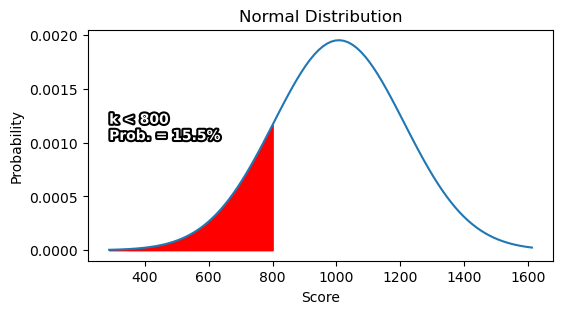

In [32]:
# Applying normal distribution
mu = sat_score["score"].mean()
sigma = sat_score["score"].std()
minv = sat_score["score"].min()
maxv = sat_score["score"].max()
k = 800
normal = norm(mu, sigma)

# probability of the event
prob_k = normal.cdf(k)
print(f"The probability that a student will score less than {k} is {prob_k:.2%}")

# Sampling normal distribution
sample = np.linspace(minv, maxv, 100) 
sample_pdf = normal.pdf(x=sample) 

# Sampling event
event = np.linspace(minv, k, 50) 
event_pdf = normal.pdf(x=event)

# plot the probability distribution
plt.figure(figsize = (6, 3))
plt.plot(sample, sample_pdf) # pdf of the normal distribution
plt.fill_between(event, event_pdf, color="r") 
text = plt.annotate(f"k < {k}\nProb. = {prob_k:,.1%}", 
                    xy=(minv,plt.ylim()[1]*0.5), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel("Score") 
plt.ylabel("Probability") 
plt.title("Normal Distribution") 
plt.show() 

**Calculate the probability that a student will score more than 1300 in SAT exam.**

The probability that a student will score more than 1300 is 7.62%


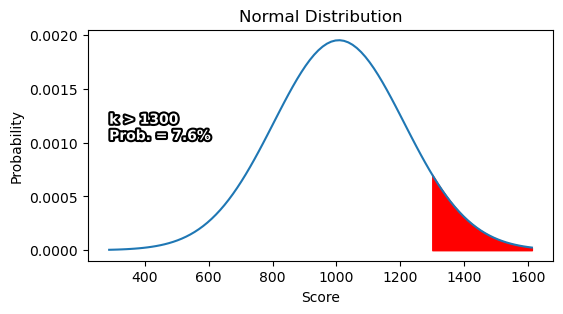

In [33]:
# Defining new event
k = 1300

# probability of the event
prob_k = normal.sf(x=k)
print(f"The probability that a student will score more than {k} is {prob_k:.2%}")

# Sampling event
event = np.linspace(k, maxv, 50) 
event_pdf = normal.pdf(x=event)

# plot the probability distribution
plt.figure(figsize = (6, 3))
plt.plot(sample, sample_pdf) # pdf of the normal distribution
plt.fill_between(event, event_pdf, color="r") 
text = plt.annotate(f"k > {k}\nProb. = {prob_k:,.1%}", 
                    xy=(minv,plt.ylim()[1]*0.5), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel("Score") 
plt.ylabel("Probability") 
plt.title("Normal Distribution") 
plt.show() 

**Calculate the minimum marks a student must score in order to be in the 90th percentile**

The 90th percentile score should be 1269


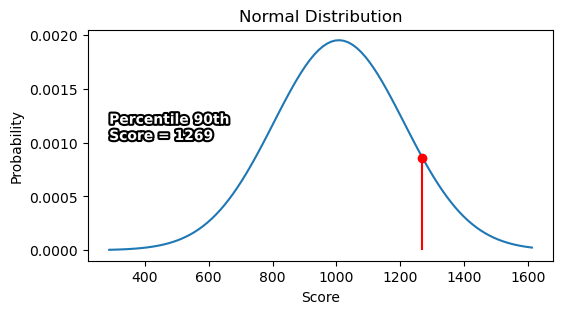

In [34]:
# Defining new event
percentile = 0.90

# Getting the percentile
score = round(normal.ppf(percentile))
print(f"The {int(percentile*100)}th percentile score should be {score}")
ymax = normal.pdf(score)

# plot the probability distribution
plt.figure(figsize = (6, 3))
plt.plot(sample, sample_pdf) # pdf of the normal distribution
plt.vlines(score, 0, ymax, "r")
plt.plot(score, ymax, 'ro')
text = plt.annotate(f"Percentile {int(percentile*100)}th\nScore = {score}", 
                    xy=(minv,plt.ylim()[1]*0.5), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel("Score") 
plt.ylabel("Probability") 
plt.title("Normal Distribution") 
plt.show() 

**Calculate the minimum marks a student must score in order to be in the top 5%**

Minimum score to be in the top 5% should be 1344


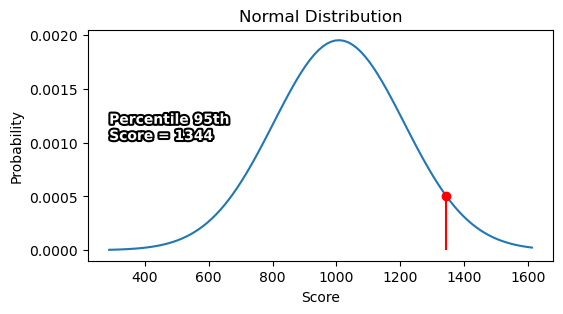

In [35]:
# Defining new event
percentile = 0.95

# Getting the percentile
score = round(normal.ppf(percentile))
print(f"Minimum score to be in the top 5% should be {score}")
ymax = normal.pdf(score)

# plot the probability distribution
plt.figure(figsize = (6, 3))
plt.plot(sample, sample_pdf) # pdf of the normal distribution
plt.vlines(score, 0, ymax, "r")
plt.plot(score, ymax, 'ro')
text = plt.annotate(f"Percentile {int(percentile*100)}th\nScore = {score}", 
                    xy=(minv,plt.ylim()[1]*0.5), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='black'), path_effects.Normal()])
plt.xlabel("Score") 
plt.ylabel("Probability") 
plt.title("Normal Distribution") 
plt.show() 

**Conclusion:** 

1) Only 15.51% of students will score below 800 and 7.62% of students will score above 1300. It shows that the 2020 SAT exam's complexity is moderate. 

2) Students should score at least 1269 to secure the 90th percentile.

3) Students should score at least 1344 to be in the top 5%.

In [36]:
print('68% of data fall in: ',(mean-std, mean+std))
print('95% of data fall in: ',(mean-2*std, mean+2*std))
print('99% of data fall in: ',(mean-3*std, mean+3*std))

68% of data fall in:  (38.8, 56.2)
95% of data fall in:  (30.1, 64.9)
99% of data fall in:  (21.400000000000002, 73.6)


### Standardization of Normal Variables

Suppose we know that the SAT scores are normally distributed with mean 1000 and standard deviation 200 and ACT scores are normally distributed with mean 20 and standard deviation 5. 

A college provides admission only on the basis of SAT and ACT scores. The college admin decides to give the top performer fellowship to the student who has performed the best among all applicants. The highest score received from applicants who appeared for SAT is 1350 and the highest score received from applicants who appeared for ACT is 30. 

Help the college to choose the best candidate for the fellowship!

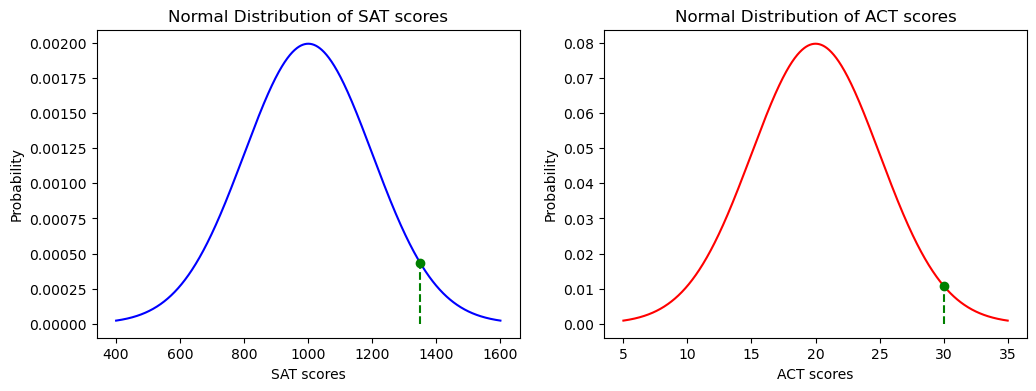

In [37]:
samples = 1000

# Sampling the SAT score
sat_mean = 1000
sat_std = 200
sat_minv, sat_maxv = 400, 1600
sat_norm = norm(loc=1000, scale=200)
sat_sample = np.linspace(sat_minv, sat_maxv, samples)
sat_pdf = sat_norm.pdf(sat_sample)

student_sat_score = 1350
student_sat_pdf = sat_norm.pdf(student_sat_score)

# Sampling the ACT score
act_mean = 20
act_std = 5
act_minv, act_maxv = 5, 35
act_norm = norm(loc=20, scale=5)
act_sample = np.linspace(act_minv, act_maxv, samples)
act_pdf = act_norm.pdf(act_sample)

student_act_score = 30
student_act_pdf = act_norm.pdf(student_act_score)

# plot the two distribution for SAT and ACT scores
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,4))

ax1.plot(sat_sample, sat_pdf, color = 'b')
ax1.vlines(student_sat_score, 0, student_sat_pdf, linestyle='--', color = 'green')
ax1.plot(student_sat_score, student_sat_pdf, 'go')
ax1.set_title('Normal Distribution of SAT scores')
ax1.set_xlabel('SAT scores')
ax1.set_ylabel('Probability')

ax2.plot(act_sample, act_pdf, color = 'r')
ax2.vlines(student_act_score, 0, student_act_pdf, linestyle='--', color = 'green')
ax2.plot(student_act_score, student_act_pdf, 'go')
ax2.set_title('Normal Distribution of ACT scores')
ax2.set_xlabel('ACT scores')
ax2.set_ylabel('Probability')
plt.show()

In the above plot, the blue curve represents the distribution of SAT scores and the red curve represents the distribution of ACT scores. The highest scores of the applicants in SAT and ACT exams are dotted with green lines in the respective distributions. However, it is difficult for us to compare the raw highest scores in the above plot. Thus, we need to standardize the two scores and compare their Z-scores.

Let's plot the standard normal distribution and visualize the above standardized scores.

The Z-score of highest scorer in SAT among all the applicants 1.75
The Z-score of highest scorer in ACT among all the applicants 2.0


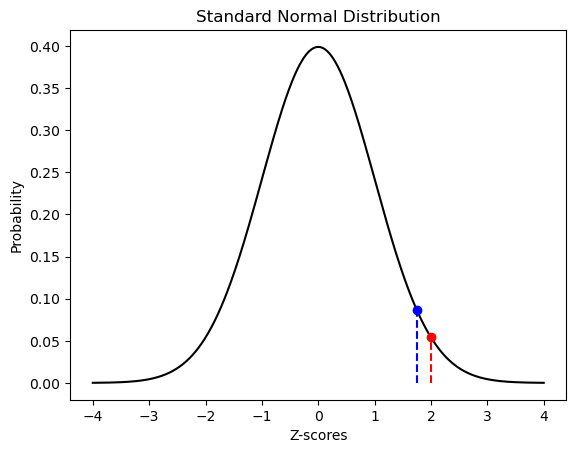

In [38]:
# find the Z-score of highest scorer in SAT and in ACT among all the applicants
top_sat = (student_sat_score - sat_mean) / sat_std
top_act = (student_act_score - act_mean) / act_std

print('The Z-score of highest scorer in SAT among all the applicants', top_sat)
print('The Z-score of highest scorer in ACT among all the applicants', top_act)

# Sampling a standardize distribution
z_sample = np.linspace(-4, 4, samples)
z_pdf = norm.pdf(z_sample)

# plot the standard normal distribution and visualize the standardized scores
fig, ax = plt.subplots()
ax.plot(z_sample, z_pdf, color = 'k')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')

ax.vlines(top_sat, 0, norm.pdf(top_sat), linestyle='--', color = 'blue')
ax.plot(top_sat, norm.pdf(top_sat), 'bo')
ax.vlines(top_act, 0, norm.pdf(top_act), linestyle='--', color = 'red')
ax.plot(top_act, norm.pdf(top_act), 'ro')
plt.show()

In the above plot, the blue line represents the standardized highest SAT score of the applicants which is 1.75 standard deviations above the mean and the red line represents the standardized highest ACT score of the applicants which is 2 standard deviations above the mean.

This means that among the applicants, the highest scorer in ACT performed better than the highest scorer in SAT.

Thus, the top performer fellowship should be given to the applicant who has scored highest in ACT.

#### ✅ $\color{darkgreen}{\text{Exercise:}}$

A student wants to decide in which of these three subjects (physics, history, and computer science), he has performed the best in the class. The data for the physics, history, and computer science scores is given in the below table:

| Subject |	Marks Scored | Out of |	Mean | Standard deviation |
|--|--|--|--|--|
| Physics |	56.88 |	80 |	47.5 |	12.3 |
| History |	77.1 |	100 |	77 |	8.2 |
| Computer science |	35.55 |	50 |	33 |	7.3 |

Help the student to decide for which subject his performance is good.

The Z-score of Phisics: 0.7626016260162604
The Z-score of History: 0.01219512195121882
The Z-score of Computer Science: 0.3493150684931503


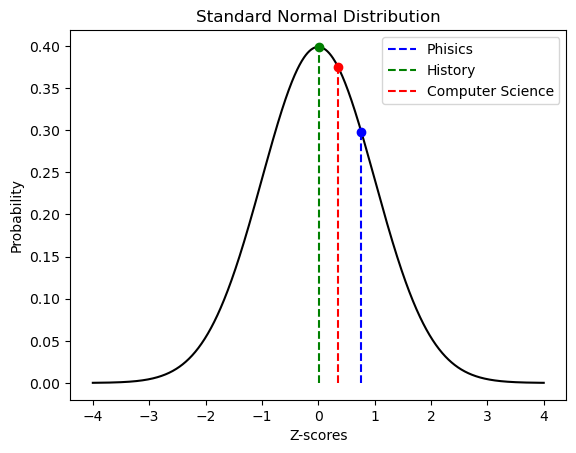

In [39]:
samples = 1000

# Phisics
phisics_score, phisics_mean, phisics_std, phisics_max = 56.88, 47.5, 12.3, 80 
history_score, history_mean, history_std, history_max = 77.1, 77, 8.2, 100
science_score, science_mean, science_std, science_max = 35.55, 33, 7.3, 50

# Z-score
z_phisics = (phisics_score - phisics_mean) / phisics_std
z_history = (history_score - history_mean) / history_std
z_science = (science_score - science_mean) / science_std

print('The Z-score of Phisics:', z_phisics)
print('The Z-score of History:', z_history)
print('The Z-score of Computer Science:', z_science)

# Sampling a standardize distribution
z_sample = np.linspace(-4, 4, samples)
z_pdf = norm.pdf(z_sample)

# plot the standard normal distribution and visualize the standardized scores
fig, ax = plt.subplots()
ax.plot(z_sample, z_pdf, color = 'k')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')

ax.vlines(z_phisics, 0, norm.pdf(z_phisics), linestyle='--', color='blue', label='Phisics')
ax.plot(z_phisics, norm.pdf(z_phisics), 'bo')
ax.vlines(z_history, 0, norm.pdf(z_history), linestyle='--', color='green', label='History')
ax.plot(z_history, norm.pdf(z_history), 'go')
ax.vlines(z_science, 0, norm.pdf(z_science), linestyle='--', color='red', label='Computer Science')
ax.plot(z_science, norm.pdf(z_science), 'ro')
plt.legend()
plt.show()

Salaries of employees in a company are normally distributed with a mean of *\$ 55,000* and a standard deviation of *\$ 6,200*. 

What percentage of employees earn approximately between *\$ 59,000* and *\$ 67,000*?

Percentage of employees earning between 59000 and 67000 is 23.3%


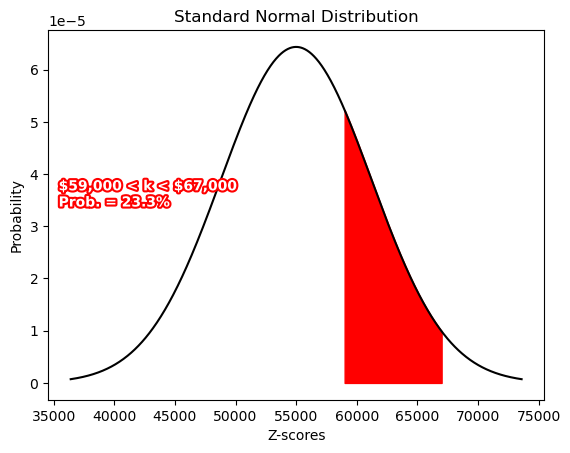

In [40]:
# Getting the percentage of employees earn approximately between $ 59,000 and $ 67,000
mean, std = 55000, 6200
emp_norm = norm(loc=mean, scale=std)

t_67k = 67000
cdf_67k = emp_norm.cdf(t_67k)
t_59k = 59000
cdf_59k = emp_norm.cdf(t_59k)
prob = cdf_67k-cdf_59k

print(f'Percentage of employees earning between {t_59k} and {t_67k} is {prob:.1%}')


# Sampling a standardize distribution
sample = np.linspace(mean-3*std, mean+3*std, 1000)
sample_pdf = emp_norm.pdf(sample)

# Sampling the event
event = np.linspace(t_59k, t_67k, 200)
event_pdf = emp_norm.pdf(event)

# plot the standard normal distribution and visualize the standardized scores
fig, ax = plt.subplots()
ax.plot(sample, sample_pdf, color = 'k')
ax.set_title('Standard Normal Distribution')
ax.set_xlabel('Z-scores')
ax.set_ylabel('Probability')
ax.fill_between(event, event_pdf, color="r") 
text = plt.annotate(f"\${t_59k:,.0f} < k < \${t_67k:,.0f}\nProb. = {prob:,.1%}", 
                    xy=(plt.xlim()[0]*1.025,plt.ylim()[1]*0.5), color='white', weight='bold')
text.set_path_effects([path_effects.Stroke(linewidth=3, foreground='red'), path_effects.Normal()])
plt.show()

# <a name ='link4'>**Sampling and Inferencial Foundations**</a>

**Sampling**

- The mean of $ \overline{X} $ is equal to $ \mu $.
- The standard deviation of $ \overline{X} $ is equal to $ \frac{\sigma}{\sqrt{n}}$
- Even the population is not normally distributed, then for sufficiently large $ n $, $ \overline{X} $ is also normally distributed.

# <a name ='link4'>**Central Limit Theorem (CLT)**</a>


Central Limit Theorem states that if we independently draw multiple samples from a population, take the mean of each sample and plot these (sample means), then the plot will tend to normal distribution as the size of samples increases, **regardless** of the shape of the population distribution.

### Let's watch CLT in action using a python simulation

#### Here is a Uniform Distribution (which is most definitely *not Normal*)

Mean of population: 4.992191134015858


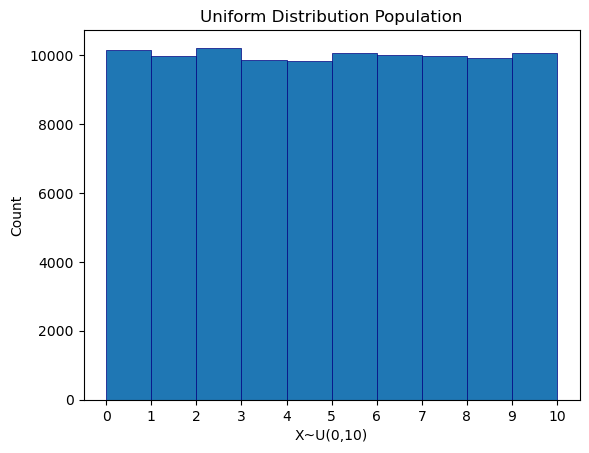

In [41]:
# importing the required function
from scipy.stats import uniform

# setting the seed for reproducibility
np.random.seed(1)

# creating a uniform distribution population of size 100000
uniform_pop = uniform.rvs(0, 10, size=100000)
print('Mean of population:', np.mean(uniform_pop))

# visualizing the uniform distribution
plt.hist(uniform_pop, edgecolor='navy', linewidth=.5)
plt.title("Uniform Distribution Population")
plt.xticks(range(11))
plt.xlabel("X~U(0,10)")
plt.ylabel("Count")
plt.show()

#### Let's create a sampling distribution from this population (sample size=5, number of samples = 500)

*   draw a sample of size 5, so n=5, we draw 5 independent observations
*   get the mean of these 5 observations, i.e - sample mean
*   repeat the above 2 steps 500 times, so that we get 500 sample means, where n=5 

Now, let's observe the shape of this sampling distribution.

In [42]:
def sample_mean_distribution(pop, n, iter=500, seed=1):
    """Sampling distribution with size n from population pop
    pop: list. population.
    n: size of samples to generate.
    iter: how many times samples will be generated.
    seed: seed for reporducibility.
    """
    np.random.seed(seed) # set the seed for reproducibility
    sample_means = [] # list to store sample means
    
    # iterate the loop to draw multiple samples
    for j in range(iter):
        sample = np.random.choice(pop, size=n) # draw a sample of size n
        sample_mean = np.mean(sample)                  # calculate the sample mean
        sample_means.append(sample_mean)               # append the sample mean to sample_means list
    
    print('Mean of population:', np.mean(pop))
    print('Mean of sample mean:', np.mean(sample_means))
    
    # plot the histogram of sample means
    sns.displot(sample_means, kde=True, height=2.5, aspect=2)
    plt.title("Distribution of Sample Means for n = " + str(n))
    plt.xlabel("sample mean")
    plt.ylabel("count")
    plt.show()

Mean of population: 4.992191134015858
Mean of sample mean: 5.020703651213186


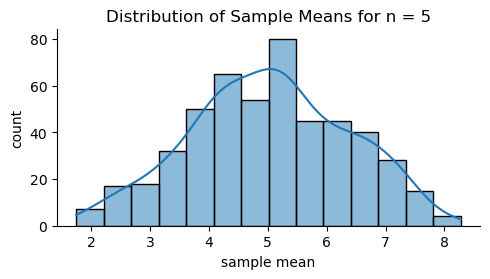

In [43]:
sample_mean_distribution(uniform_pop, 5)

#### Let's create another sampling distribution from this population, increase the sample size to 15 (n=15)

Mean of population: 4.992191134015858
Mean of sample mean: 5.023725425839273


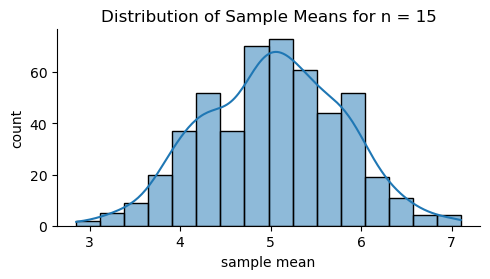

In [44]:
sample_mean_distribution(uniform_pop, 15)

#### Increase the sample size to 30 (n=30)

Mean of population: 4.992191134015858
Mean of sample mean: 5.0130801360854695


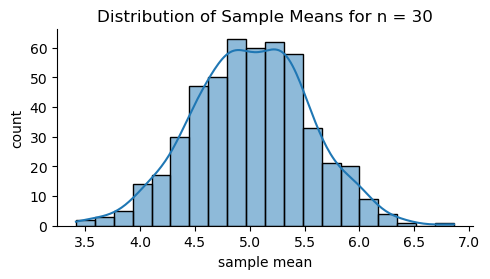

In [45]:
sample_mean_distribution(uniform_pop, 30)

#### Increase the sample size to 50 (n=50)

Mean of population: 4.992191134015858
Mean of sample mean: 4.9901667175493705


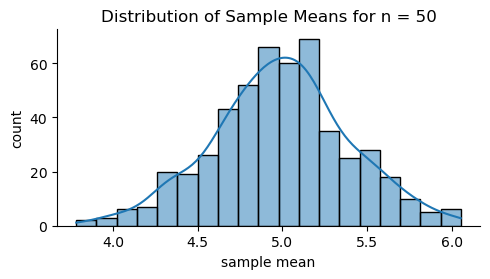

In [46]:
sample_mean_distribution(uniform_pop, 50)

#### Insight

* Observe how the sampling distribution moves closer to normality as the sample size increases.

#### When the population distribution is Normal

Mean of population: 0.005253028489682668


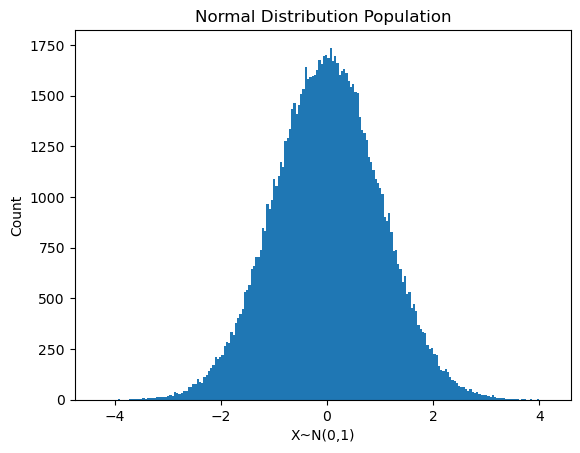

In [47]:
# import the required function
from scipy.stats import norm

# set the seed for reproducibility
np.random.seed(1)

# create a normal distribution population of size 100000
normal_pop = norm.rvs(0, 1, size=100000)
print('Mean of population:', np.mean(normal_pop))

# visualize the normal distribution
plt.hist(normal_pop, 200)
plt.title("Normal Distribution Population")
plt.xlabel("X~N(0,1)")
plt.ylabel("Count")
plt.show()

#### Let's create a sampling distribution from this population (sample size=5, number of samples = 500)

*   draw a sample of size 5, so n=5, we draw 5 independent observations
*   get the mean of these 5 observations, i.e - sample mean
*   repeat the above 2 steps 500 times, so that we get 500 sample means, where n=5 

Now, let's observe the shape of this sampling distribution.

Mean of population: 0.005253028489682668
Mean of sample mean: -0.012633797614613765


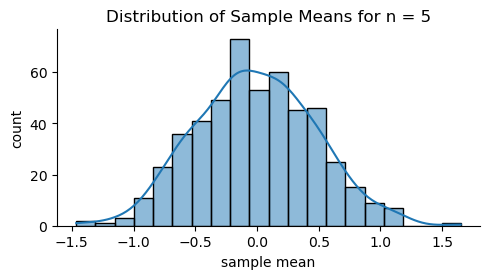

In [48]:
sample_mean_distribution(normal_pop, 5)

#### Insight

* When the population distribution is Normal, sampling distribution is close to normal for even the smaller sampling sizes like n = 5

#### Let's check sampling distribution for sample size n = 15

Mean of population: 0.005253028489682668
Mean of sample mean: -0.002998134384286691


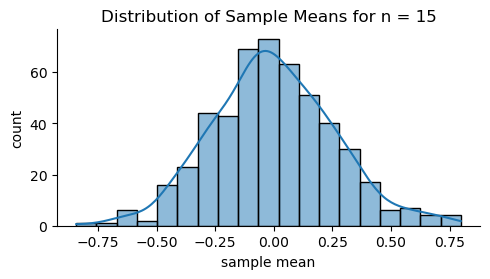

In [49]:
sample_mean_distribution(normal_pop, 15)

#### Sampling Distribution when Sample Size n = 30



Mean of population: 0.005253028489682668
Mean of sample mean: 0.0067075524291860715


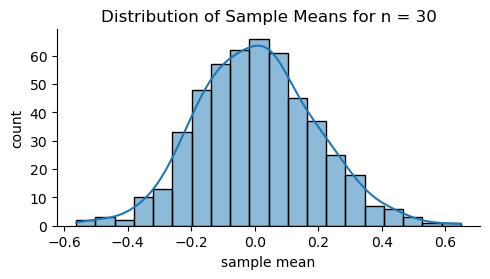

In [50]:
sample_mean_distribution(normal_pop, 30)

#### Let's see if CLT works if the population distribution is Exponential Distribution (which again is clearly *not Normal*)

Mean of population: 0.9986631228789192


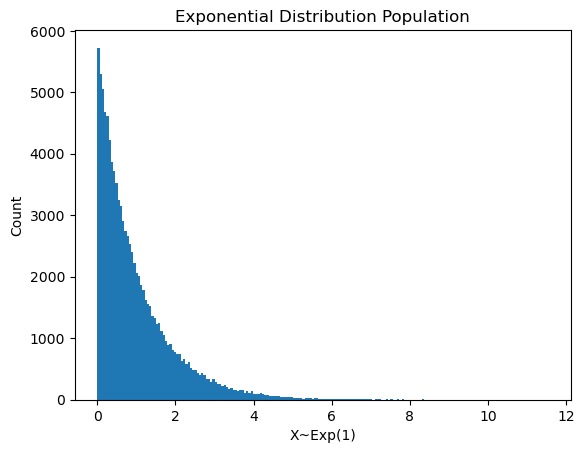

In [51]:
# import the required function
from scipy.stats import expon

# set the seed for reproducibility
np.random.seed(1)

# create a exponential distribution population of size 100000
exp_pop = expon.rvs(size=100000)
print('Mean of population:', np.mean(exp_pop))

# visualize the exponential distribution
plt.hist(exp_pop, 200)
plt.title("Exponential Distribution Population")
plt.xlabel("X~Exp(1)")
plt.ylabel("Count")
plt.show()

#### Sampling Distribution for Sample Size n = 5

Mean of population: 0.9986631228789192
Mean of sample mean: 1.023882665869448


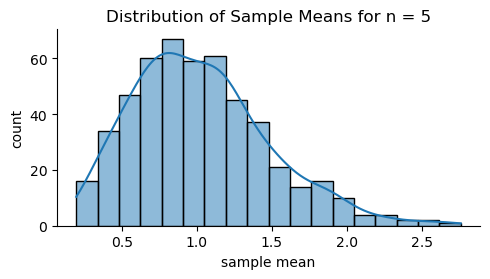

In [52]:
sample_mean_distribution(exp_pop, 5)

#### Sampling Distribution for Sample Size n = 15

Mean of population: 0.9986631228789192
Mean of sample mean: 1.0126660251223747


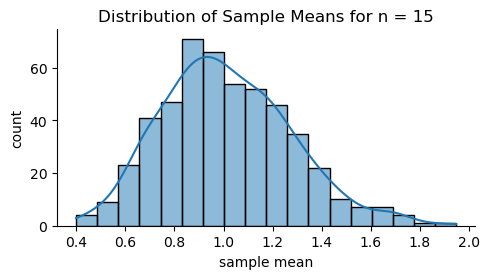

In [53]:
sample_mean_distribution(exp_pop, 15)

#### Sampling Distribution for Sample Size n = 30

Mean of population: 0.9986631228789192
Mean of sample mean: 1.0095139577837797


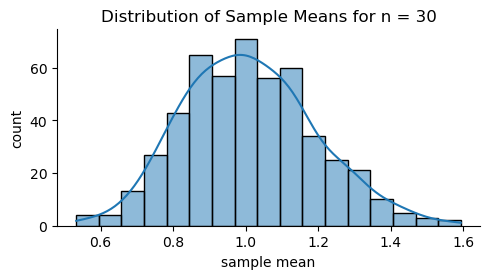

In [54]:
sample_mean_distribution(exp_pop, 30)

#### Sampling Distribution for Sample Size n = 50

Mean of population: 0.9986631228789192
Mean of sample mean: 1.0017683988088069


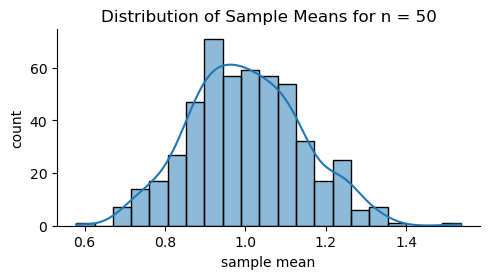

In [55]:
sample_mean_distribution(exp_pop, 50)

### Key Takeaway

* We have tried different distributions to simulate the fundamental idea of CLT. We can see that no matter what the shape of the population distribution is, the plot of samples means approximately tends to normal distribution as sample size increases.

#### ✅ $\color{darkgreen}{\text{Exercise:}}$

In [56]:
# collect sample means of 600 samples of size 50 from an exponential population?
from scipy.stats import expon
exp_pop = expon.rvs(size = 100000)

import numpy as np
sample_means=[]
for j in range(600):
    sample = np.random.choice(exp_pop, size = 50)
    sample_mean = np.mean(sample)   
    sample_means.append(sample_mean)
    
print('Mean of population:', np.mean(exp_pop))
print('Mean of sample mean:', np.mean(sample_means))

Mean of population: 1.0012091424334517
Mean of sample mean: 0.9995576195226696


# <a name='link5'>**Point Estimation**</a>

#### Let's see how population mean is estimated by the sample mean

A non-profit organization sampled the files of the local forest department to come up with the following amounts (in thousands of dollars) of damages for 10 wildfire incidents:

120, 55, 60, 10, 8, 150, 44, 58, 62, 123

What is the estimate of the average amount of damage in wildfires, in that area?

In [57]:
# get the sample data
sample = np.array([120, 55, 60, 10, 8, 150, 44, 58, 62, 123])

# find the mean of the sample
x_bar = np.mean(sample)
x_bar

69.0

#### Insight
* The estimate of the average amount of damages in wildfires in that area is $69,000.

Usually, point estimate of an unknown population parameter is the corresponding sample statistic. 

For example:

a. Population mean μ is estimated by the sample mean x̅.

b. Population median is estimated by the sample median x̃.

c. Population proportion of success π is estimated by the sample proportion of success p.

# <a name='link6'>**Confidence Interval**</a>

#### **Let's see how confidence interval is constructed for the population mean when std dev is known**

It is rarely the case when you know the population standard deviation and not the mean. However, it may not be as unlikely an assumption as it seems. For a tight manufacturing process which is in place for a long time, the variability in the process may be controlled, but with small changes in temperature or humidity, the mean may change.


Let's construct the confidence interval for an example where the population mean is unknown and the standard deviation is known.



The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new coffee machine. The mean of the sample is found to be 110 mg. It is known that the standard deviation from all the machines of that manufacturer is 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.





In [58]:
# import the required function
from scipy.stats import norm

# set the values of sample mean and sigma
x_bar, sigma = 110, 7

# set the value of sample size
n = 50

# Set the confidence level
ci = 0.95

# construct the confidence interval
np.round(norm.interval(ci, loc=x_bar, scale=sigma / np.sqrt(n)), 2) # last parameter: # of decimals.

array([108.06, 111.94])

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.06 mg and 111.94 mg.

#### **Let's see how confidence interval is constructed for the population mean when std dev is unknown**

The example discussed above is based on the assumption that the population standard deviation is known. However, in the majority of cases, that assumption will not be satisfied.

When we do not know the population standard deviation, it can be estimated from the sample. In this case, the sample mean follows Student's t distribution with (n-1) degrees of freedom. 

Just like the normal distribution, t-distribution is also very useful in statistical inference. It is a symmetric distribution around 0. For a very large d.f., the t distribution is almost identical to the standard normal distribution.The parameter of t-distribution is known as degrees of freedom.

Below is the graph of t-distribution for various degrees of freedom(k). We can notice that the distribution approximates to normal as the value of k increases.

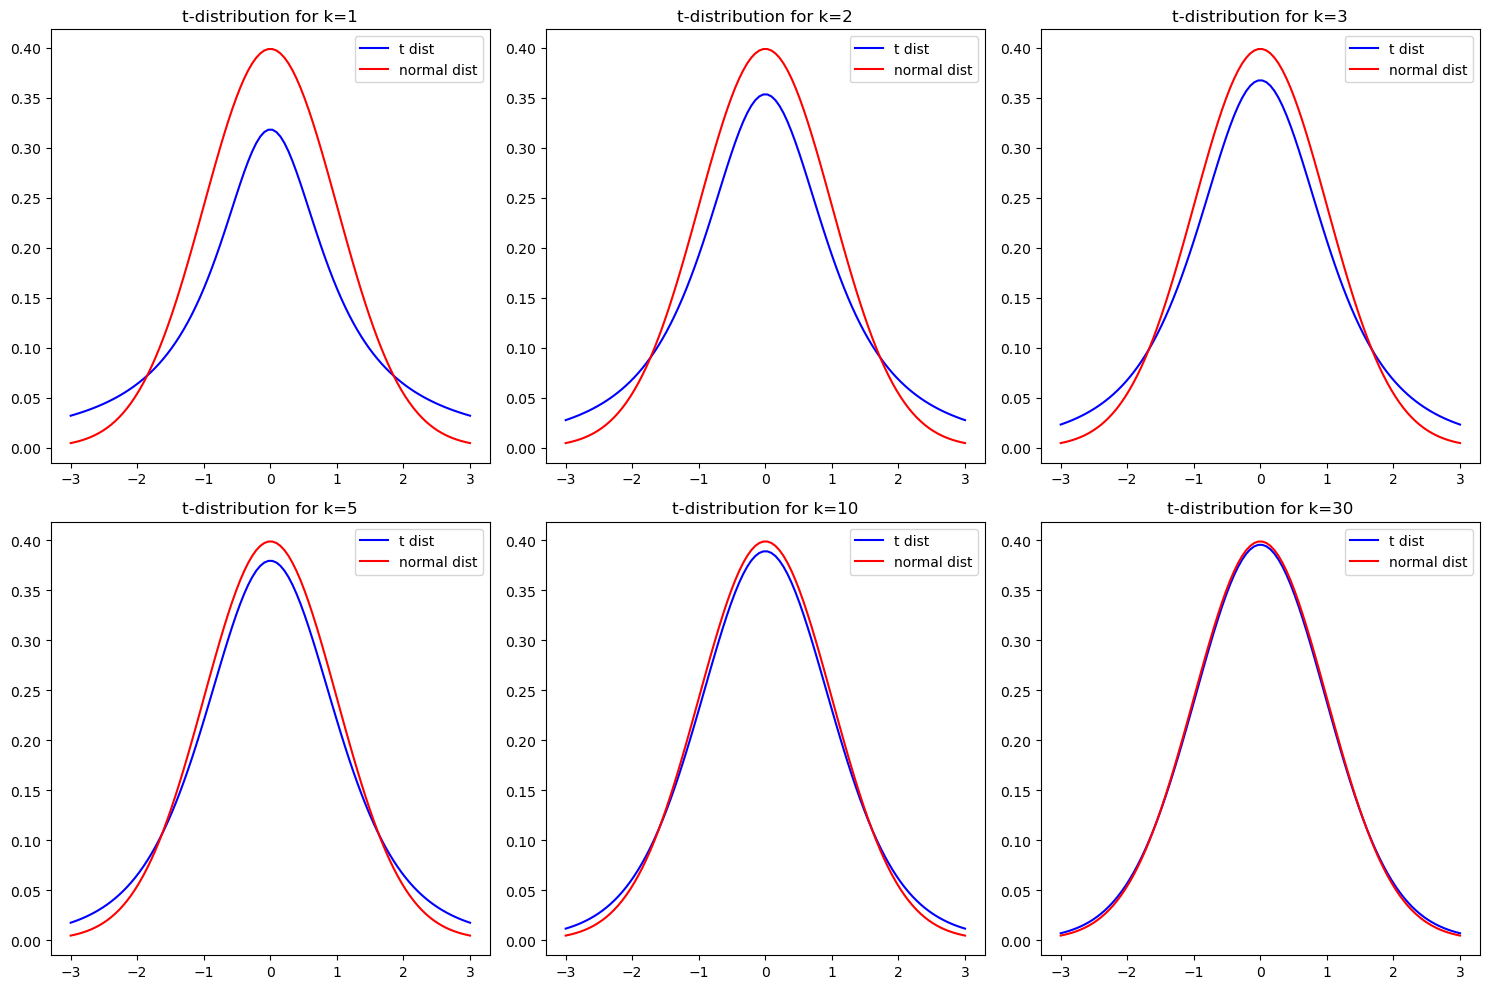

In [59]:
# import the required function
from scipy.stats import t
from scipy.stats import norm

# set the values for x
x = np.linspace(-3, 3, 100)

# plot the t distribution for different values of k
fig, axes = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 10))
axes = axes.ravel()
for i, k in zip(range(6), [1, 2, 3, 5, 10, 30]):
    ax = axes[i]
    ax.plot(x, t.pdf(x, df=k), color="blue", label="t dist")
    ax.plot(x, norm.pdf(x), color="red", label="normal dist")
    ax.set_title("t-distribution for k={0}".format(k))
    ax.legend(loc="upper right", fontsize=10)
plt.tight_layout()

Let's use the t-distribution to construct the confidence interval for the mean when population standard deviation is unknown.

The caffeine content (in mg) was examined for a random sample of 50 cups of black coffee dispensed by a new machine. The mean of the sample is found to be 110 mg and the sample standard deviation is estimated to be 7 mg. Construct a 95% confidence interval for μ, the mean caffeine content for cups dispensed by the machine.

In [60]:
# import the required function
from scipy.stats import t

# set the values of sample mean and sample standard deviation
x_bar, s = 110, 7

# set the value of sample size and degrees of freedom
n = 50
k = n - 1

# Set the confidence level
ci = 0.95

# construct the confidence interval
np.round(t.interval(ci, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2) # last parameter: # of decimals.

array([108.01, 111.99])

#### Insight
* 95% of the time, the mean caffeine content for cups of coffee dispensed by the machine will be between 108.01 mg and 111.99 mg.

#### Key Takeaways

* The confidence interval for the population mean can be constructed for both cases when the population standard deviation is known and when it is unknown. The latter case is more common which demands the application of t-distribution with appropriate degrees of freedom.


* The general approach to the construction of confidence interval is to use the appropriate sample statistic to estimate the population parameter and use the proper percentile point of the sampling distribution.

#### ✅ $\color{darkgreen}{\text{Exercise:}}$

In [61]:
# A random sample of 100 men is taken and their mean height is found to be 180 cm. 
# The population variance is 36 cm2. 
# Find the 95% confidence interval for the mean height of the population (μ).

x_bar, sigma = 180, np.sqrt(36) # set the values of sample mean and sigma
n = 100                         # set the value of sample size
ci = 0.95                       # Set the confidence level

# construct the confidence interval
mean_ci = np.round(norm.interval(ci, loc=x_bar, scale=sigma / np.sqrt(n)), 4)  # Last param: decimals.
print('95% CI of mean man height in cm: ', mean_ci)

95% CI of mean man height in cm:  [178.824 181.176]


In [62]:
# A landlord wants to rent an unfurnished one-bedroom apartment in Chicago. 
# The mean monthly rent for a random sample of 100 apartments advertised on a website 
# that lists apartments in Chicago for rent is $1000.
# Assume a population standard deviation of $200. 
# What is the 95% confidence interval for the mean rent?

x_bar, sigma = 1000, 200  # set the values of sample mean and sigma
n = 100                   # set the value of sample size
ci = 0.95                 # Set the confidence level

# construct the confidence interval
mean_ci = np.round(norm.interval(ci, loc=x_bar, scale=sigma / np.sqrt(n)), 1)  # Last param: decimals.
print('95% CI of mean rent in Chicago ($): ', mean_ci)

95% CI of mean rent in Chicago ($):  [ 960.8 1039.2]


In [63]:
# A survey of females aged 16-60 years was conducted by the Department of Population Censuses (DPC). 
# It was found that a sample of fifty female students has a mean height of 160.9 cm 
# with a standard deviation of 6 cm.
# Determine the confidence interval of height with a confidence level of 95% 
# and conclude whether their heights are typical to the general population.

x_bar, s = 160.9, 6 # set the values of sample mean and sample standard deviation
n = 50              # set the value of sample size
k = n - 1           # set the value of degrees of freedom
ci = 0.95           # Set the confidence level

# construct the confidence interval
mean_ci = np.round(t.interval(ci, df=k, loc=x_bar, scale=s / np.sqrt(n)), 2) # last param: # decimals.
print('95% CI of mean females aged 16-60 years height in cm: ', mean_ci)
print('Heights are typical to the general population')

95% CI of mean females aged 16-60 years height in cm:  [159.19 162.61]
Heights are typical to the general population


_______________